# Band Structure of Graphene Nano-Ribbon Using Tight Binding Model
Computational Physics Project, Jan 2025


In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
!pip install ipywidgets

C:\Users\Joyce\AppData\Local\Temp\ipykernel_90764\876953136.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


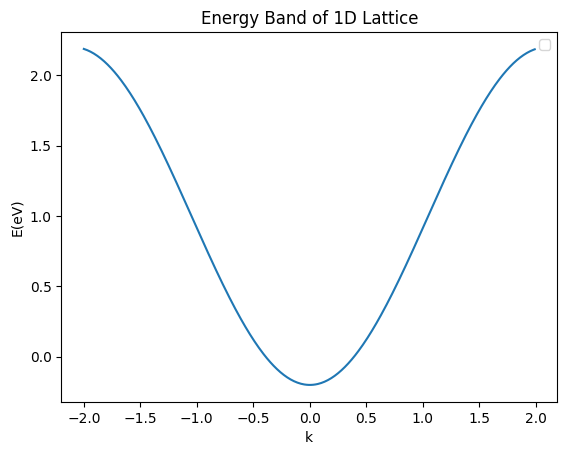

In [3]:
# 1D model
T = -0.6 #eV
E0 = 1.0 #eV
a = 1.5
range = 2.0
grid_size = 0.01

def find_ek(k):
    return E0+ 2*T*np.cos(k*a)

k = np.arange(-range, range, grid_size)
Ek = find_ek(k)

fig, ax = plt.subplots()
ax.plot(k, Ek, linestyle='solid')


# Labels and title
plt.xlabel('k')
plt.ylabel('E(eV)')
plt.title("Energy Band of 1D Lattice")
plt.legend()
plt.show()


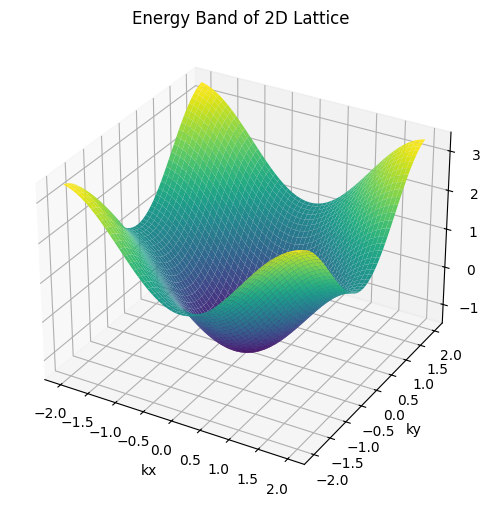

In [4]:
# 2D model

def find_ek_2D(kx, ky):
    return E0+ 2*T*(np.cos(kx*a) + np.cos(ky*a))

k_x = np.arange(-range, range, grid_size)
k_y = np.arange(-range, range, grid_size)
kx, ky = np.meshgrid(k_x, k_y)

Ek_2D = find_ek_2D(kx, ky)

# Plot 2D energy band
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx, ky, Ek_2D, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E(eV)')
plt.title("Energy Band of 2D Lattice")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Constants and parameters
E0 = 0
T = 1  # Example hopping parameter
a = 1  # Lattice constant
grid_size = 0.1  # Grid size for k-space
range_val = np.pi  # Range for k-space

# Function to compute energy at (kx, ky, kz)
def find_ek_3D(kx, ky, kz):
    return E0 + 2 * T * (np.cos(kx * a) + np.cos(ky * a) + np.cos(kz * a))

# Create k-space grid
k_x = np.arange(-range_val, range_val, grid_size)
k_y = np.arange(-range_val, range_val, grid_size)
k_z = np.arange(-range_val, range_val, grid_size)
kx, ky, kz = np.meshgrid(k_x, k_y, k_z, indexing='ij')

# Calculate energy for all k-points
Ek_3D = find_ek_3D(kx, ky, kz)

# Function to visualize 3D slice for a fixed y value
def visualize_3D_slice_fixy(y=0):
    # Convert y to an index
    y_idx = int(y / grid_size)
    if y_idx < 0 or y_idx >= ky.shape[1]:
        raise ValueError(f"y={y} is out of bounds for the given grid.")

    # Extract slices for fixed ky
    kx_slice = kx[:, y_idx, :]
    kz_slice = kz[:, y_idx, :]
    Ek_slice = find_ek_3D(kx_slice, ky[0, y_idx, 0], kz_slice)

    # Automatically calculate vmin and vmax based on the slice
    vmin, vmax = Ek_slice.min(), Ek_slice.max()

    # Plot the energy band with consistent color scale
    plt.contourf(kx_slice, kz_slice, Ek_slice, levels=50, cmap='viridis', vmin=-7, vmax=7)
    # plt.contourf(kx_slice, kz_slice, Ek_slice, levels=50, cmap='viridis', vmin=vmin, vmax=vmax)
    plt.colorbar(label="E(eV)")

    # Labels and title
    plt.xlabel('kx')
    plt.ylabel('kz')
    plt.title(f"Slice of Energy Band (ky={y:.2f}) in 3D Lattice")


    # Truncate ky axis for the plot
    plt.xlim(kx_slice.min(), kx_slice.max())  # Set kx limits
    plt.ylim(kz_slice.min(), kz_slice.max())  # Set kz limits

    plt.show()

# Create an interactive plot using ipywidgets
interact(
    visualize_3D_slice_fixy,
    y=widgets.FloatSlider(value=0, min=0, max=range_val, step=grid_size, description="ky", continuous_update=False)
)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='ky', max=3.141592653589793)…

<function __main__.visualize_3D_slice_fixy(y=0)>

# Graphene
## Analytical Solution

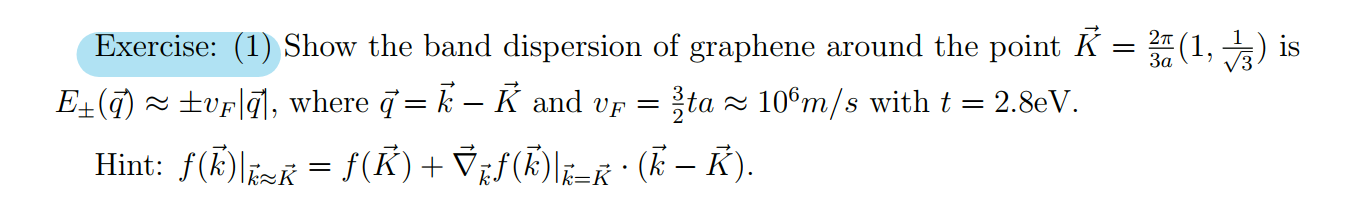

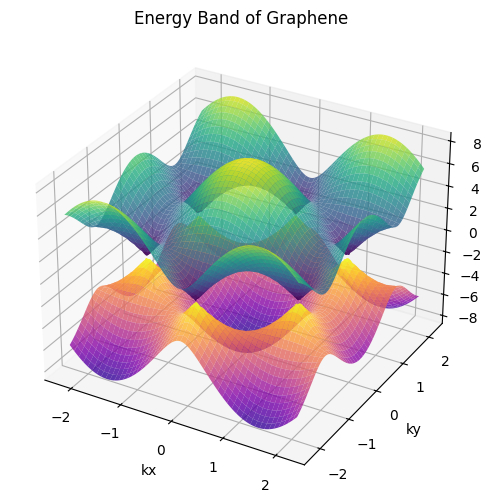

In [6]:
# draw out analytical solution

# Constants
t = 2.8  # eV
a = 1.42  # angstrom
E0 = 0  # eV

# Corrected energy band functions
def E(t, kx, ky):
    arg = 1 + 4 * np.cos(kx *3* a / 2) * np.cos(np.sqrt(3) * ky * a / 2) + 4*np.cos(ky * np.sqrt(3)*a / 2)**2
    return E0 + t * np.sqrt(arg), E0 - t * np.sqrt(arg)


# Define k-space grid
k_x = np.linspace(-1 * np.pi / a, 1 * np.pi / a, 500)
k_y = np.linspace(-1 * np.pi / a, 1 * np.pi / a, 500)

def draw_graphene_band(k_x, k_y):
    kx, ky = np.meshgrid(k_x, k_y, indexing='ij')

    # Compute energy bands
    Ek_pos, Ek_neg= E(t, kx, ky)


    # Plot 2D energy band
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Plot positive band
    ax.plot_surface(kx, ky, Ek_pos, cmap='viridis', edgecolor='none', alpha=0.8, label='E_pos')

    # Plot negative band
    ax.plot_surface(kx, ky, Ek_neg, cmap='plasma', edgecolor='none', alpha=0.8, label='E_neg')


    # Labels and title
    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_zlabel('E(eV)')
    plt.title("Energy Band of Graphene")
    plt.show()

draw_graphene_band(k_x,k_y)

Dirac cone around high symmetry point K

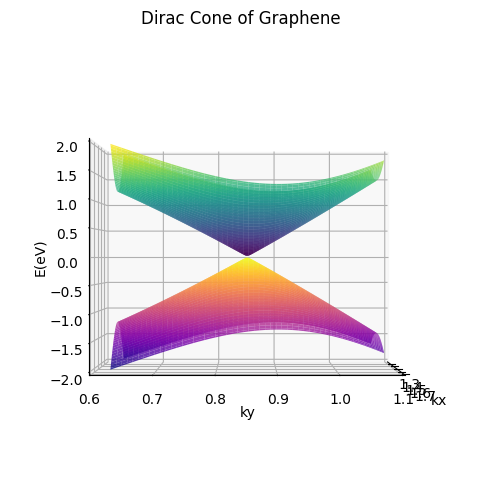

In [7]:
ptx = 2*np.pi/ (3*a)
pty = 2*np.pi / (3*np.sqrt(3)*a)
dx = 0.1*np.pi / a
# Define k-space grid
k_x = np.linspace(ptx - dx, ptx + dx, 100)
k_y = np.linspace(pty - dx, pty + dx, 100)

kx, ky = np.meshgrid(k_x, k_y, indexing='ij')

# Compute energy bands
Ek_pos, Ek_neg = E(t, kx, ky)

# Plot 2D energy band
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=0)  # Example: 30° elevation, 45° azimuth


# Plot positive band
ax.plot_surface(kx, ky, Ek_pos, cmap='viridis', edgecolor='none', alpha=0.8, label='E_pos')

# Plot negative band
ax.plot_surface(kx, ky, Ek_neg, cmap='plasma', edgecolor='none', alpha=0.8, label='E_neg')


# Labels and title
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E(eV)')
plt.title("Dirac Cone of Graphene")
plt.show()

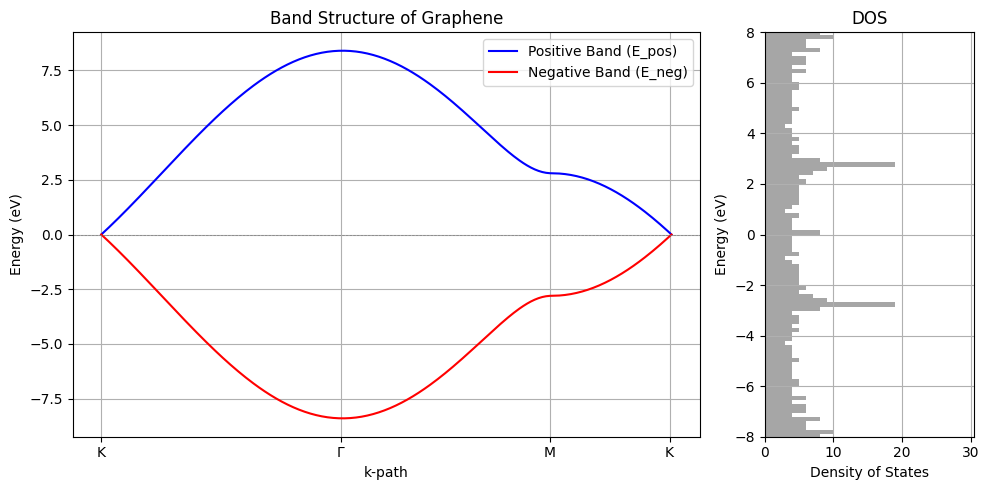

In [8]:
# Define the interpolate_k_path function
def interpolate_k_path(k_path_segments, num_points_total, num_points_segments):
    """
    Generate an evenly spaced k-path along the given high-symmetry points and update the number of points per segment.

    Parameters:
        k_path_segments (list of tuples): List of (start, end) k-points for each segment.
        num_points_total (int): Total number of points across the entire k-path.
        num_points_segments (list): List to store the number of points for each segment (modified in place).

    Returns:
        np.ndarray: Array of interpolated k-points along the entire path.
    """
    # Calculate the length of each segment
    segment_lengths = [
        np.linalg.norm(np.array(end) - np.array(start)) for start, end in k_path_segments
    ]
    total_length = sum(segment_lengths)

    # Distribute points proportionally across segments
    temp_points = [
        int(num_points_total * (length / total_length)) for length in segment_lengths
    ]
    remaining_points = num_points_total - sum(temp_points)
    for i in np.arange(remaining_points):  # Distribute remaining points evenly
        temp_points[i % len(temp_points)] += 1

    # Update num_points_segments list in place
    num_points_segments.extend(temp_points)

    # Interpolate points for each segment
    k_path = []
    for (start, end), num_points in zip(k_path_segments, temp_points):
        for t in np.linspace(0, 1, num_points, endpoint=False):  # Exclude endpoint to avoid duplication
            k_path.append(np.array(start) * (1 - t) + np.array(end) * t)
    k_path.append(k_path_segments[-1][1])  # Add the final endpoint of the last segment

    return np.array(k_path)

# Graphene-specific constants
a = 1.42  # Lattice constant (Angstroms)
t = 2.8   # Hopping parameter (eV)


# Define high-symmetry points
k_gamma = np.array([0, 0])
k_k = np.array([2 * np.pi / (3 * a), 2 * np.pi / (3 * a * np.sqrt(3))])
k_m = np.array([2 * np.pi / (3 * a), 0])

# Define k-path segments and labels
k_path_segments = [(k_k, k_gamma), (k_gamma, k_m), (k_m, k_k)]
k_labels = ["K", "Γ", "M", "K"]
num_points_total = 300

# Interpolate k-path
num_points_segments = []
k_path = interpolate_k_path(k_path_segments, num_points_total, num_points_segments)

# Compute energy bands along the k-path
energies_pos, energies_neg = zip(*[E(t, *k_point) for k_point in k_path])
energies_pos = list(energies_pos)
energies_neg = list(energies_neg)


# Plot band structure
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

# Band structure plot
axs[0].plot(np.arange(len(k_path)), energies_pos, label="Positive Band (E_pos)", color='blue')
axs[0].plot(np.arange(len(k_path)), energies_neg, label="Negative Band (E_neg)", color='red')

# Add k-point labels and vertical lines
k_tick_positions = [0]
position = 0
for i, segment in enumerate(k_path_segments):
    position += num_points_segments[i]
    k_tick_positions.append(position - 1)
axs[0].set_xticks(k_tick_positions)
axs[0].set_xticklabels(k_labels)

# Labels and formatting
axs[0].set_ylabel("Energy (eV)")
axs[0].set_xlabel("k-path")
axs[0].set_title("Band Structure of Graphene")
axs[0].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axs[0].legend()
axs[0].grid(True)

# Combine energies for DOS
flat_energies = np.concatenate([np.array(energies_pos).flatten(), np.array(energies_neg).flatten()])

# Density of States (DOS) plot
bins = 100
axs[1].hist(flat_energies, bins=bins, orientation='horizontal', color='gray', alpha=0.7)
axs[1].set_ylim(-8, 8)  # Adjust the y-limits to match the energy range
axs[1].set_xlabel("Density of States")
axs[1].set_ylabel("Energy (eV)")
axs[1].set_title("DOS")
axs[1].grid(True)

# Final adjustments and display
plt.tight_layout()
plt.show()



## Numerical Solution

define hamiltonian: 

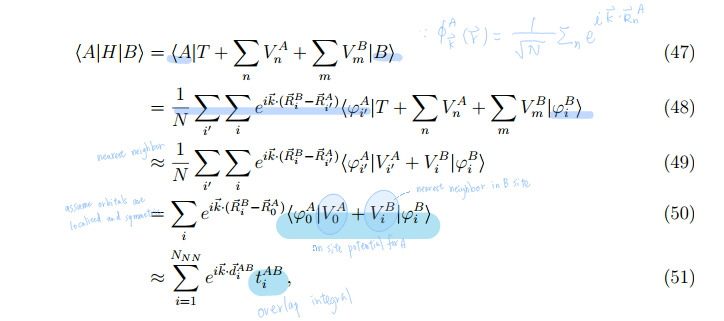

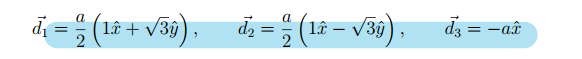

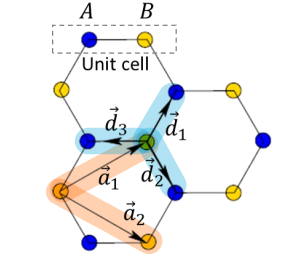

In [9]:
# Define the Hamiltonian matrix for graphene.
def Hamiltonian_Graphene(kx, ky):
    a = 1.42  # nearest neighbor distance
    t = 2.8  # Hopping parameter
    d1 = (a / 2) * np.array([1, np.sqrt(3)])
    d2 = (a / 2) * np.array([1, -np.sqrt(3)])
    d3 = -a * np.array([1, 0])
    sx = np.array([[0, 1], [1, 0]])
    sy = np.array([[0, -1j], [1j, 0]])
    hx = np.cos(np.dot([kx, ky], d1)) + np.cos(np.dot([kx, ky], d2)) + np.cos(np.dot([kx, ky], d3))
    hy = np.sin(np.dot([kx, ky], d1)) + np.sin(np.dot([kx, ky], d2)) + np.sin(np.dot([kx, ky], d3))
    H = -t * (hx * sx - hy * sy)
    return H

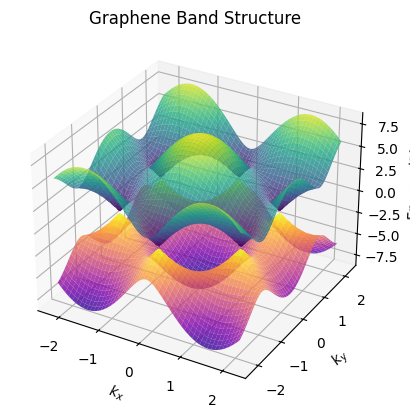

In [10]:
# Function to plot the dispersion relation.
def plot_dispersion(m, n, BZx1, BZx2, BZy1, BZy2):
    # Generate mesh grid
    kx_range = np.linspace(BZx1, BZx2, num=m)
    ky_range = np.linspace(BZy1, BZy2, num=n)
    energies = np.zeros((n, m, 2))  # Only two eigenvalues per k-point (2x2 Hamiltonian)
    
    # Calculate eigenvalues for each (kx, ky)
    for i, kx in enumerate(kx_range):
        for j, ky in enumerate(ky_range):
            H = Hamiltonian_Graphene(kx, ky)
            evals, _ = LA.eig(H)
            energies[j, i, :] = np.sort(evals.real)  # Store sorted real eigenvalues
    
    # Create mesh for plotting
    X, Y = np.meshgrid(kx_range, ky_range)
    
    # Plot each band
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, energies[:, :, 1], cmap='viridis', alpha=0.8, edgecolor='none', label='Band 1')
    ax.plot_surface(X, Y, energies[:, :, 0], cmap='plasma', alpha=0.8, edgecolor='none', label='Band 2')
    
    # Set axis labels
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    ax.set_zlabel('Energy (E)')
    plt.title('Graphene Band Structure')
    plt.show()
    return energies

a = 1.42
# Run the plotting function
BZx1, BZx2 = -np.pi / a, np.pi / a  # Typical BZ range for graphene
BZy1, BZy2 = -np.pi / a, np.pi / a
energies = plot_dispersion(100, 100, BZx1, BZx2, BZy1, BZy2)

### Dirac Cone

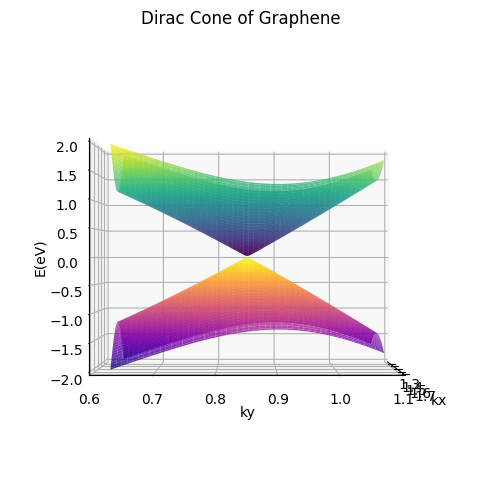

In [11]:
a = 1.42
ptx = 2 * np.pi / (3 * a)
pty = 2 * np.pi / (3 * np.sqrt(3) * a)
dx = 0.1 * np.pi / a

# Define k-space grid
kx = np.linspace(ptx - dx, ptx + dx, 100)
ky = np.linspace(pty - dx, pty + dx, 100)

energies = np.zeros((100, 100, 2))  # Only two eigenvalues per k-point (2x2 Hamiltonian)

# Calculate eigenvalues for each (kx, ky)
for i, kx_val in enumerate(kx):
    for j, ky_val in enumerate(ky):
        H = Hamiltonian_Graphene(kx_val, ky_val)
        evals, _ = LA.eig(H)
        energies[j, i, :] = np.sort(evals.real)  # Store sorted real eigenvalues

# print(energies)

# Plot 2D energy band
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=0)

# Create mesh for plotting
kx, ky = np.meshgrid(kx, ky)
    

# Plot positive band
ax.plot_surface(kx, ky, energies[:, :, 1], cmap='viridis', edgecolor='none', alpha=0.8, label='E_pos')

# Plot negative band
ax.plot_surface(kx, ky, energies[:, :, 0], cmap='plasma', edgecolor='none', alpha=0.8, label='E_neg')

# Labels and title
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E(eV)')
plt.title("Dirac Cone of Graphene")
plt.show()


## Analytical vs Numerical

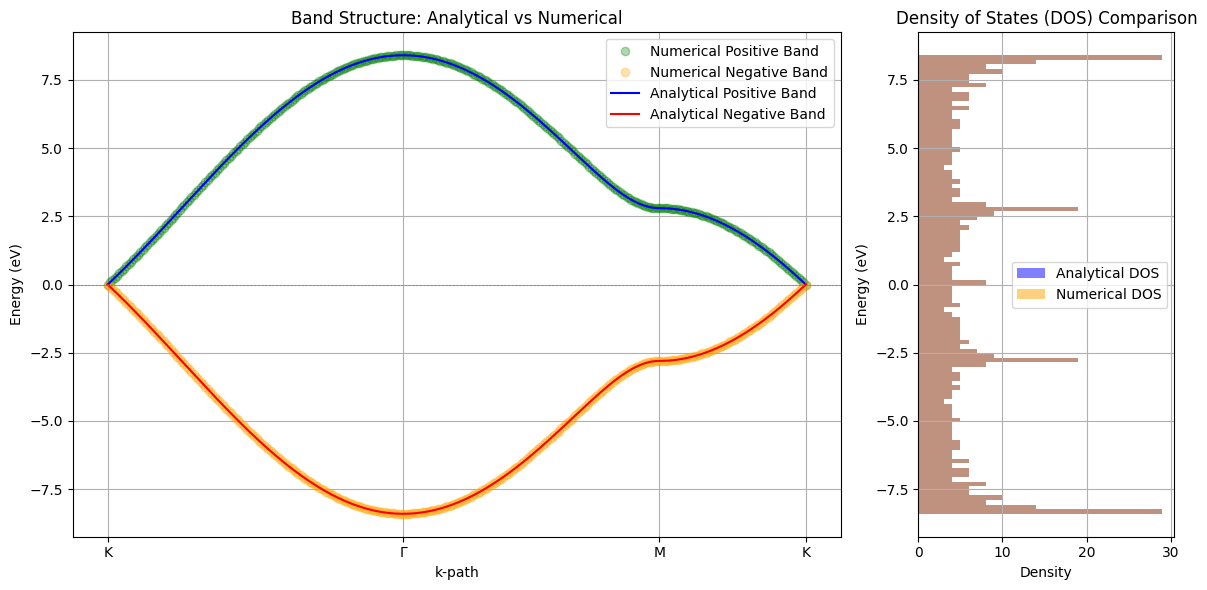

In [12]:

# Define high-symmetry points
k_gamma = np.array([0, 0])
k_k = np.array([2 * np.pi / (3 * a), 2 * np.pi / (3 * a * np.sqrt(3))])
k_m = np.array([2 * np.pi / (3 * a), 0])

# Define k-path segments and labels
k_path_segments = [(k_k, k_gamma), (k_gamma, k_m), (k_m, k_k)]
k_labels = ["K", "Γ", "M", "K"]
num_points_total = 300

# Interpolate k-path
num_points_segments = []
k_path = interpolate_k_path(k_path_segments, num_points_total, num_points_segments)

# Compute energy bands along the k-path
energies_pos_a = []  # Analytical positive
energies_neg_a = []  # Analytical negative
energies_pos_n = []  # Numerical positive
energies_neg_n = []  # Numerical negative

for kx, ky in k_path:
    # Analytical solution
    e_pos, e_neg = E(t, kx, ky)  # Assume E(t, kx, ky) returns positive and negative energies
    energies_pos_a.append(e_pos)
    energies_neg_a.append(e_neg)

    # Numerical solution
    H = Hamiltonian_Graphene(kx, ky)  # Construct the Hamiltonian
    evals, _ = np.linalg.eig(H)  # Eigenvalues of Hamiltonian
    evals_sorted = np.sort(evals.real)  # Sort eigenvalues (real part)
    energies_neg_n.append(evals_sorted[0])  # Lower energy band
    energies_pos_n.append(evals_sorted[1])  # Upper energy band

# Plot band structure
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Band structure comparison
axs[0].plot(
    np.arange(len(k_path)),
    energies_pos_n,
    label="Numerical Positive Band",
    linestyle="None",  
    marker='o',       
    color='green',
    alpha=0.3
)

axs[0].plot(
    np.arange(len(k_path)),
    energies_neg_n,
    label="Numerical Negative Band",
    linestyle="None",  
    marker='o',        
    color='orange',
    alpha=0.3
)

axs[0].plot(
    np.arange(len(k_path)),
    energies_pos_a,
    label="Analytical Positive Band",
    # alpha=0.8,
    color='blue'
)
axs[0].plot(
    np.arange(len(k_path)),
    energies_neg_a,
    label="Analytical Negative Band",
    # alpha=0.,
    color='red'
)


# High-symmetry point labels and vertical lines
tick_positions = [0]
position = 0
for segment in num_points_segments:
    position += segment
    tick_positions.append(position)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(k_labels)
axs[0].set_title("Band Structure: Analytical vs Numerical")
axs[0].set_xlabel("k-path")
axs[0].set_ylabel("Energy (eV)")
axs[0].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axs[0].legend()
axs[0].grid(True)

# Density of States (DOS)
all_energies_a = np.concatenate([energies_pos_a, energies_neg_a])  # Analytical energies
all_energies_n = np.concatenate([energies_pos_n, energies_neg_n])  # Numerical energies

# Plot DOS for both analytical and numerical results
axs[1].hist(
    all_energies_a,
    bins=100,
    orientation='horizontal',
    color='blue',
    alpha=0.5,
    label="Analytical DOS"
)
axs[1].hist(
    all_energies_n,
    bins=100,
    orientation='horizontal',
    color='orange',
    alpha=0.5,
    label="Numerical DOS"
)

# Titles, labels, and legend
axs[1].set_title("Density of States (DOS) Comparison")
axs[1].set_xlabel("Density")
axs[1].set_ylabel("Energy (eV)")
axs[1].grid(True)
axs[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()



# Graphene Nanoribbons (GNRs)
## Armchair

C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


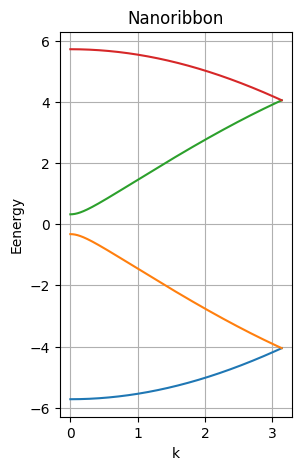

In [13]:
a = 1
kpts = np.linspace(0, np.pi/a, 1000)

t = -2.7
te = -2.7*1.12
def energy(k):
    D = np.array([
        [0, t, 0, te*np.exp(-1j*k*a)],
        [t, 0, te, 0],
        [0, te, 0, t],
        [te*np.exp(1j*k*a), 0, t, 0]
    ])
    # print(D)

    E, v = np.linalg.eig(D)
    return np.sort(E)

E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)

plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Eenergy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()

check for hamiltonian's correctness

In [14]:
def energy_general_debug(k, Na, t, te, a, width=20):
    """
    Constructs and prints the symbolic Hamiltonian for a graphene nanoribbon with fixed-width formatting.

    Parameters:
        k (float): Wavevector along the ribbon direction.
        Na (int): Number of atomic rows (width of the ribbon).
        t (str): Symbolic nearest-neighbor hopping parameter.
        te (str): Symbolic hopping parameter between unit cells.
        a (float): Lattice constant.
        width (int): Fixed width for each element in the matrix.
    """
    # Size of Hamiltonian matrix
    size = 2 * Na  # Each row contributes 2 sites (A and B)
    H = np.zeros((size, size), dtype=object)  # Use dtype=object for symbolic strings

    def find_t(i, j):
        if (i == size-2 and j == size-1) or (i == 0 and j == 1):
            return 'te'
        return 't'


    # Populate the Hamiltonian matrix
    for i in np.arange(size):
        # Hopping to nearest neighbors within the same unit cell
        if i % 2 == 0: 
            if i + 3 < size:
                H[i, (i + 3) % size] = find_t(i, (i + 3) % size)
                H[(i + 3) % size, i] = find_t(i, (i + 3) % size)
        if i % 4 == 0:  # A site
            if i + 1 < size:  # Connect to B in the same row
                H[i, i + 1] = find_t(i, i+1)
                H[i + 1, i] = find_t(i, i+1)
        # Hopping between unit cells
        elif i % 4 == 2:
            if i + 1 < size:
                H[i, i+1] = find_t(i, i+1) + " * exp(1j * k * a)"
                H[i+1, i] = find_t(i, i+1) + " * exp(-1j * k * a)"
        else:  # B site
            if i + 1 < size:  # Connect to the next row's A site
                H[i, i + 1] = find_t(i, i+1)
                H[i + 1, i] = find_t(i, i+1)

        
        

    # Print the Hamiltonian with fixed-width formatting
    print(f"Na = {Na}")
    for row in H:
        formatted_row = [
            str(elem).ljust(width) if elem else "0".ljust(width) for elem in row
        ]
        print(" | ".join(formatted_row))
        print()

# Example usage
k = "k"  # Symbolic wavevector
Na = 3  # Number of atomic rows
t = "2.8"  # Nearest-neighbor hopping parameter
te = "2.8"  # Hopping parameter between unit cells
a = "1.42"  # Lattice constant

energy_general_debug(k, 2, t, te, a)
energy_general_debug(k, 3, t, te, a)
energy_general_debug(k, 4, t, te, a)

Na = 2
0                    | te                   | 0                    | t                   

te                   | 0                    | t                    | 0                   

0                    | t                    | 0                    | te * exp(1j * k * a)

t                    | 0                    | te * exp(-1j * k * a) | 0                   

Na = 3
0                    | te                   | 0                    | t                    | 0                    | 0                   

te                   | 0                    | t                    | 0                    | 0                    | 0                   

0                    | t                    | 0                    | t * exp(1j * k * a)  | 0                    | t                   

t                    | 0                    | t * exp(-1j * k * a) | 0                    | t                    | 0                   

0                    | 0                    | 0                    | t   

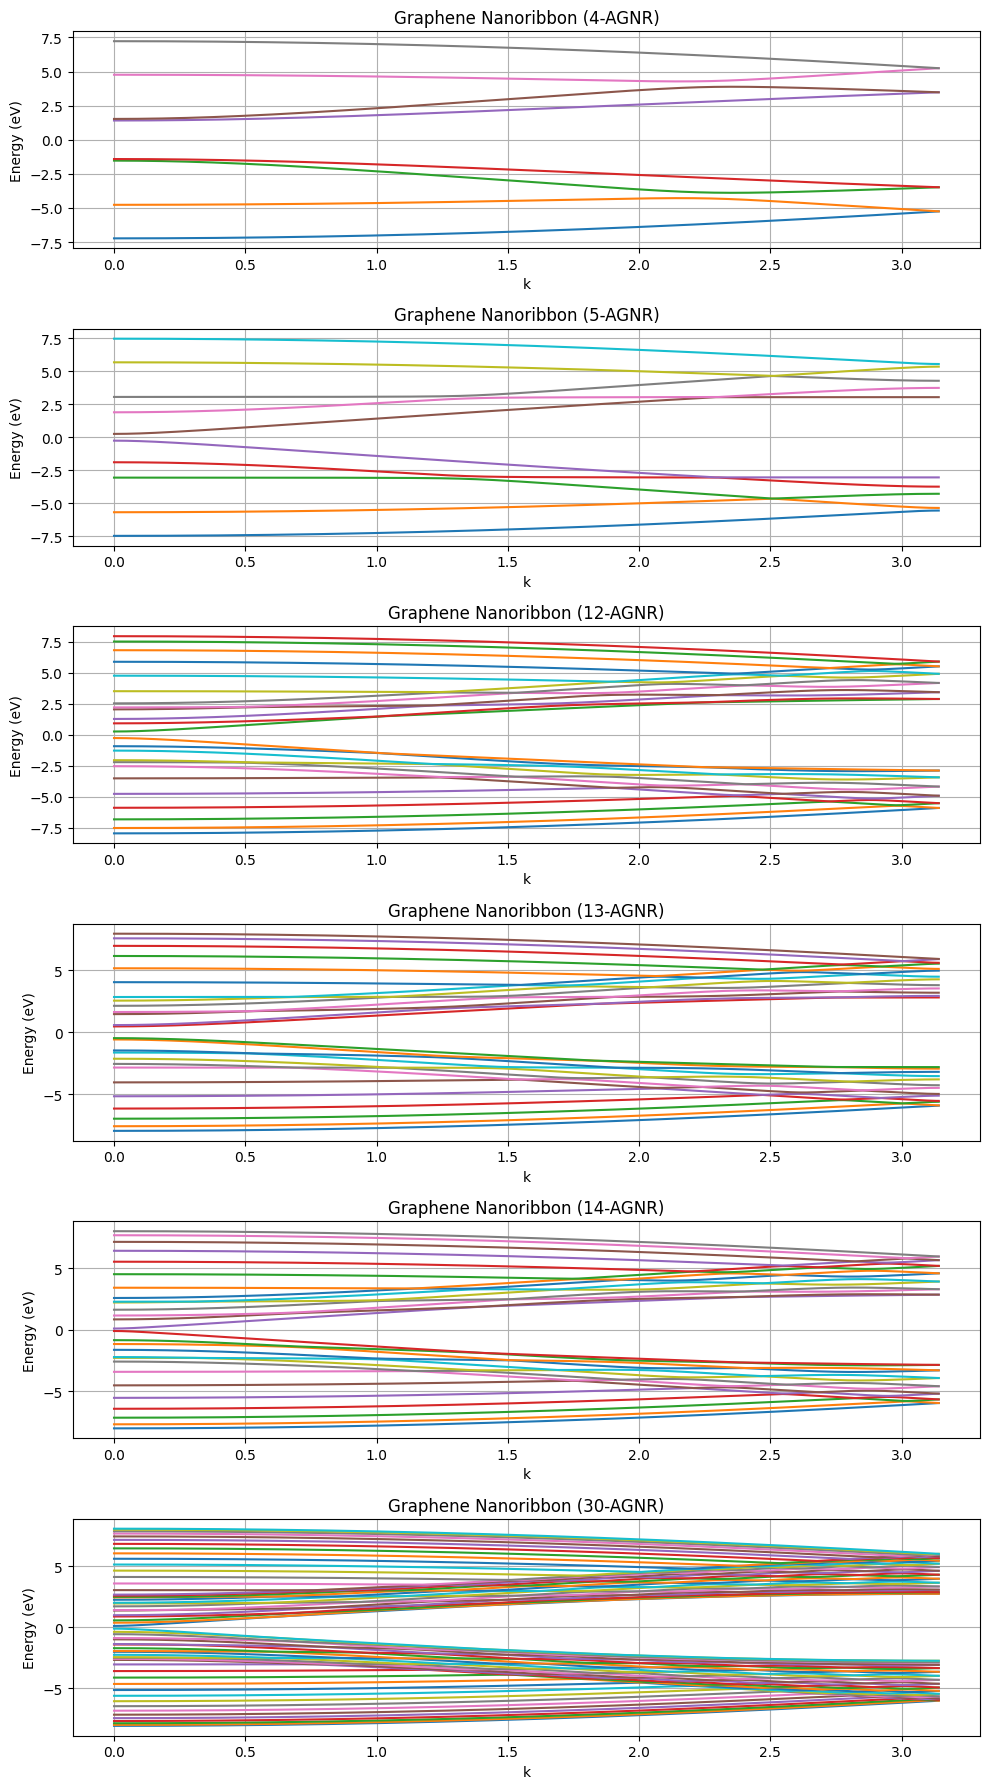

In [15]:
def find_t(i, j, size, t, te):
    """
    Determines the hopping parameter between two sites i and j.

    Parameters:
        i (int): Index of the first site.
        j (int): Index of the second site.
        size (int): Total size of the Hamiltonian matrix.
        t (float): Nearest-neighbor hopping parameter.
        te (float): Hopping parameter between unit cells.

    Returns:
        float: The hopping parameter.
    """
    if (i == size - 2 and j == size - 1) or (i == 0 and j == 1): # edge of the ribbon
        return te
    return t

def construct_hamiltonian_AGNR(k, Na, t, te, a):
    """
    Constructs the Hamiltonian for a armchair graphene nanoribbon.

    Parameters:
        k (float): Wavevector along the ribbon direction.
        Na (int): Number of atomic rows (width of the ribbon).
        t (float): Nearest-neighbor hopping parameter.
        te (float): Hopping parameter between unit cells.
        a (float): Lattice constant.

    Returns:
        np.ndarray: The Hamiltonian matrix.
    """
    size = 2 * Na  # Total number of sites in the unit cell
    H = np.zeros((size, size), dtype=complex)

    for i in np.arange(size):
        if i % 2 == 0:
            if i + 3 < size:
                H[i, (i + 3) % size] = find_t(i, (i + 3) % size, size, t, te)
                H[(i + 3) % size, i] = find_t(i, (i + 3) % size, size, t, te)

        if i % 4 == 0:
            if i + 1 < size:
                H[i, i + 1] = find_t(i, i + 1, size, t, te)
                H[i + 1, i] = find_t(i, i + 1, size, t, te)

        elif i % 4 == 2:
            if i + 1 < size:
                H[i, i + 1] = find_t(i, i + 1, size, t, te) * np.exp(1j * k * a)
                H[i + 1, i] = find_t(i, i + 1, size, t, te) * np.exp(-1j * k * a)

        else:
            if i + 1 < size:
                H[i, i + 1] = find_t(i, i + 1, size, t, te)
                H[i + 1, i] = find_t(i, i + 1, size, t, te)

    return H

def compute_band_structure(Na, kpts, t, te, a):
    """
    Computes the band structure for a given graphene nanoribbon.

    Parameters:
        Na (int): Number of atomic rows (width of the ribbon).
        kpts (np.ndarray): Array of wavevectors.
        t (float): Nearest-neighbor hopping parameter.
        te (float): Hopping parameter between unit cells.
        a (float): Lattice constant.

    Returns:
        np.ndarray: Energy bands for all k-points.
    """
    energies = []
    for i, k in enumerate(kpts):
        H = construct_hamiltonian_AGNR(k, Na, t, te, a)
        eigvals = np.linalg.eigh(H)[0]
        energies.append(np.sort(eigvals))
    return np.array(energies)

def plot_band_structure(Na_values, kpts, t, te, a):
    """
    Plots the band structure for multiple values of Na.

    Parameters:
        Na_values (list): List of Na values to plot.
        kpts (np.ndarray): Array of wavevectors.
        t (float): Nearest-neighbor hopping parameter.
        te (float): Hopping parameter between unit cells.
        a (float): Lattice constant.
    """
    plt.figure(figsize=(10, len(Na_values) * 3))
    for i, Na in enumerate(Na_values):
        plt.subplot(len(Na_values), 1, i + 1)
        energies = compute_band_structure(Na, kpts, t, te, a)
        for band in energies.T:
            plt.plot(kpts, band)
        plt.title(f"Graphene Nanoribbon ({Na}-AGNR)")
        plt.xlabel("k")
        plt.ylabel("Energy (eV)")
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Parameters
a = 1  # Lattice constant
t = 2.7  # Nearest-neighbor hopping parameter
te = 2.7*1.2  # Hopping parameter between unit cells
kpts = np.linspace(0, np.pi / a, 1000)
Na_values = [4, 5, 12, 13, 14, 30]  # List of Na values to plot

# Plot band structures
plot_band_structure(Na_values, kpts, t, te, a)


In [25]:
def plot_band_structure_with_dos(Na, kpts, t, te, a):
    energies = compute_band_structure(Na, kpts, t, te, a)
    flat_energies = energies.flatten()
    
    # Plot settings
    fig, axs = plt.subplots(1, 2, figsize=(7, 6.5), gridspec_kw={'width_ratios': [3, 1]})
    
    # Band structure
    axs[0].plot(kpts, energies)
    axs[0].set_xlabel('$k(1/da)$')
    axs[0].set_ylabel('Energy')
    axs[0].set_title(f'Graphene Nanoribbon ({Na}-AGNR)')
    axs[0].grid(True)
    
    # Density of states (DOS)
    bins = 100
    axs[1].hist(flat_energies, bins=bins, orientation='horizontal', color='gray', alpha=0.7)
    axs[1].set_xlabel('Density of States')
    axs[1].set_ylabel('Energy')
    axs[1].grid(True)
    axs[1].set_title('DOS')
    
    plt.tight_layout()
    plt.show()

# Interactive slider
def interactive_nanoribbon():
    from ipywidgets import interact

    def plot_interactive(Na):
        kpts = np.linspace(0, np.pi, 500)
        t = 2.7
        te = 2.7*1.12
        a = 1.0
        plot_band_structure_with_dos(Na, kpts, t, te, a)
    
    interact(plot_interactive, Na=(2, 30, 1))

interactive_nanoribbon()



interactive(children=(IntSlider(value=16, description='Na', max=30, min=2), Output()), _dom_classes=('widget-i…

### Band Gap as a Function of Na

In [17]:
def compute_band_gap(Na_values, t, te, a):
    """
    Computes the band gap for a series of ribbon widths (Na).

    Parameters:
        Na_values (list): List of ribbon widths to calculate the band gap for.
        t (float): Nearest-neighbor hopping parameter.
        te (float): Hopping parameter between unit cells.
        a (float): interatomic distance (in Å)

    Returns:
        dict: Dictionary with Na values grouped by mod 3 (Na = 3p, Na = 3p+1, Na = 3p+2).
    """
    band_gaps = {"3p": [], "3p+1": [], "3p+2": []}
    widths = []
    
    for Na in Na_values:
        kpts = np.linspace(0, np.pi, 500)
        energies = compute_band_structure(Na, kpts, t, te, a)
        homo = np.max(energies[energies < 0])  # Largest negative energy
        lumo = np.min(energies[energies > 0])  # Smallest positive energy
        band_gap = lumo - homo
  
        widths.append((Na-1) *a *0.5 * np.sqrt(3))  # Convert to ribbon width in Angstroms
        if Na % 3 == 0:
            band_gaps["3p"].append(band_gap)
        elif Na % 3 == 1:
            band_gaps["3p+1"].append(band_gap)
        else:
            band_gaps["3p+2"].append(band_gap)
    
    return widths, band_gaps

def plot_band_gap(widths, band_gaps):
    """
    Plots the band gap as a function of ribbon width.

    Parameters:
        widths (list): Ribbon widths in Angstroms.
        band_gaps (dict): Band gaps grouped by mod 3 (Na = 3p, Na = 3p+1, Na = 3p+2).
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(widths[:len(band_gaps["3p"])], band_gaps["3p"], label=r"$N_a=3p$", color="blue", marker="o")
    plt.scatter(widths[:len(band_gaps["3p+1"])], band_gaps["3p+1"], label=r"$N_a=3p+1$", color="orange", marker="s")
    plt.scatter(widths[:len(band_gaps["3p+2"])], band_gaps["3p+2"], label=r"$N_a=3p+2$", color="magenta", marker="^")
    
    plt.xlabel(r"$w_a$ (Å)", fontsize=12)
    plt.ylabel(r"$\Delta_a$ (eV)", fontsize=12)
    plt.title("Band Gap of Na-AGNRs vs Width", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


Pure tight binding


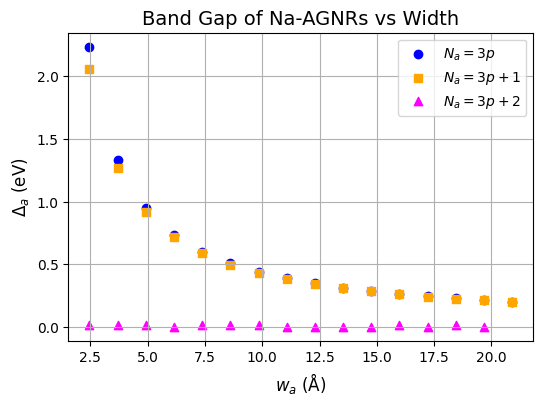

Considering shrinking effect


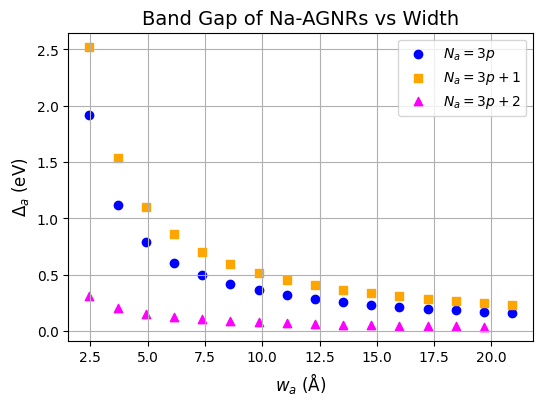

In [18]:
# Parameters
Na_values = np.arange(3, 50)  # Ribbon widths (atomic rows)
a = 1.42  # interatomic distance (in Å)

# Compute and plot
print("Pure tight binding")
widths, band_gaps = compute_band_gap(Na_values, t=2.7, te=2.7, a=1.42)
plot_band_gap(widths, band_gaps)

print("Considering shrinking effect")
widths, band_gaps = compute_band_gap(Na_values, t=2.7, te=2.7*1.12, a=1.42)
plot_band_gap(widths, band_gaps)
